In [8]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

df_cor = pd.read_csv('data_v7.csv', sep=';')

# Alleen doorgeven van de numerieke variabelen, dus alle kolommen behalve landnamen, aan de correlatiematrix
df_no_country = df_cor.drop(['country'], axis=1)
df_final_cor = df_no_country.select_dtypes(include=[np.number])

print(df_final_cor.columns.tolist())

['population', 'co2', 'co2_per_capita', 'gdp', 'gdp_per_capita', 'hdi', 'life_expectancy']


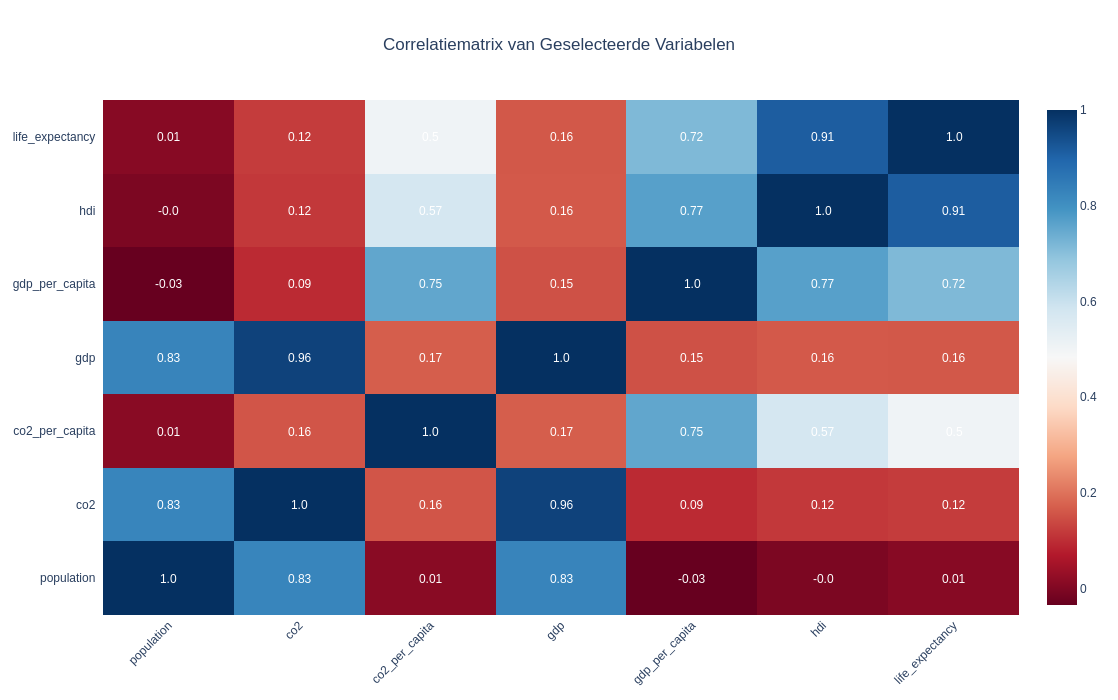

In [9]:
# Bereken de correlatiematrix
corr_matrix = df_final_cor.corr()

# Maak een interactieve heatmap voor correlatie
fig = ff.create_annotated_heatmap(
    z=corr_matrix.to_numpy(),
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    annotation_text=corr_matrix.round(2).astype(str).to_numpy(),
    showscale=True,
    colorscale='RdBu'
)

# Update layout om de variabelennamen op de x-as aan te passen
fig.update_layout(
    title='Correlatiematrix van Geselecteerde Variabelen',
    title_x=0.5,
    xaxis=dict(
        tickmode='linear',
        tickangle=-45,
        side='bottom'
    ),
    yaxis=dict(tickmode='linear'),
    width=900, height=700
)

# Toon de figuur
fig.show()
